# Introduction

Artificial Neural Networks form the basic building blocks of Deep Learning algorithms.


They are computational models inspired by the human brain.
Comprising interconnected nodes or neurons organized into layers, ANNs learn from data through training, adjusting connection weights to minimize errors. Activation functions introduce non-linearity, allowing networks to capture complex patterns.

## Understanding with an example

We have data of past covid tests i.e., the test result of the patient, and also symptoms of the person.

**Response variable** - Test result (Positive/Negative)

**Explanatory variables** - Body temperature, presence of cough, presence of tastelessness,.... (rest of the symptoms)


## Steps Involved

1. Forward Propagation

    1.1. Math
          1.1.1. Input to Hidden layer Linear
          1.1.2. Activation
          1.1.3. Hidden to Output layer
    1.2. Code

2. Backward Propagation!

    2.1. Math
    
    2.2. Code

# 1. Forward Propagation



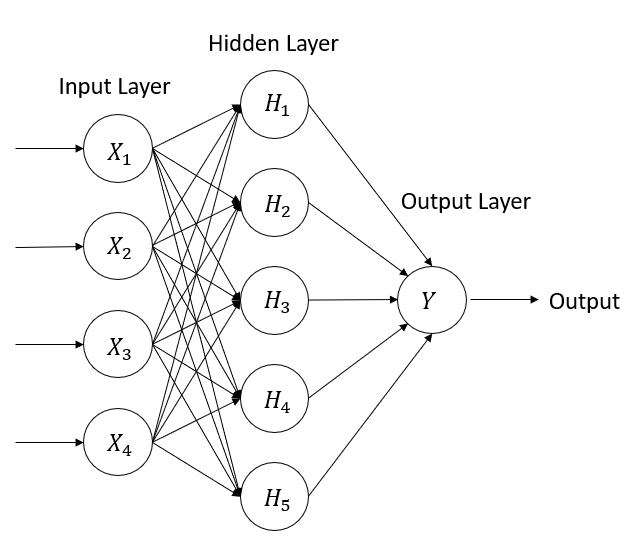

> Inputs

1.   $X_1$ - Body temperature
2.   $X_2$ - Presence of cough
3.   $X_3$ - Presence of covid in primary contacts
4.   $X_4$ - Tastelesness


> Output

*   Y - Patient is covid positive (1) or covid negative (0)


## 1.1. Math

We have 4 inputs, and 5 hidden layers.

lets consider the first hidden layer,

### 1.1.1. Inputs to Hidden Layer

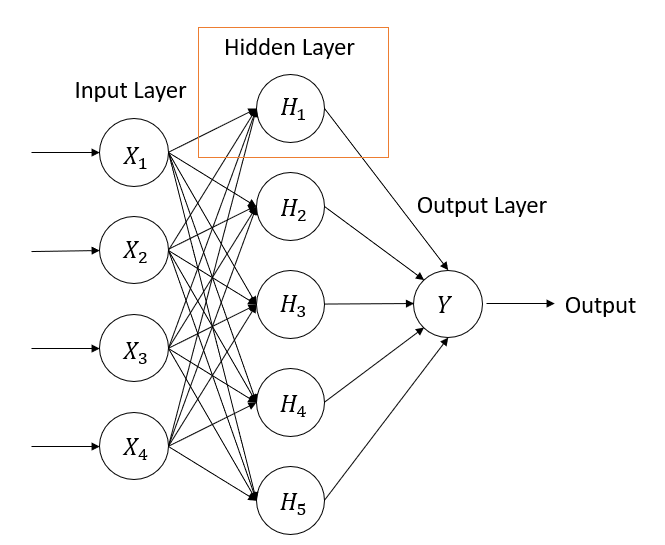



> The first neuron in the hidden layer takes all inputs with a linear combination



$H_{1}^1 = W_{11} X_1+W_{21} X_2 + W_{31} X_3 + W_{41} X_4$








### 1.1.2 Activation



> A non-linear activation is applied on this linear combination



$H_{1} = \sigma(H_{i}^1)$



> Here $\sigma$ is sigmoid function

$\sigma(x) = 1/{1+e^{-x}}$

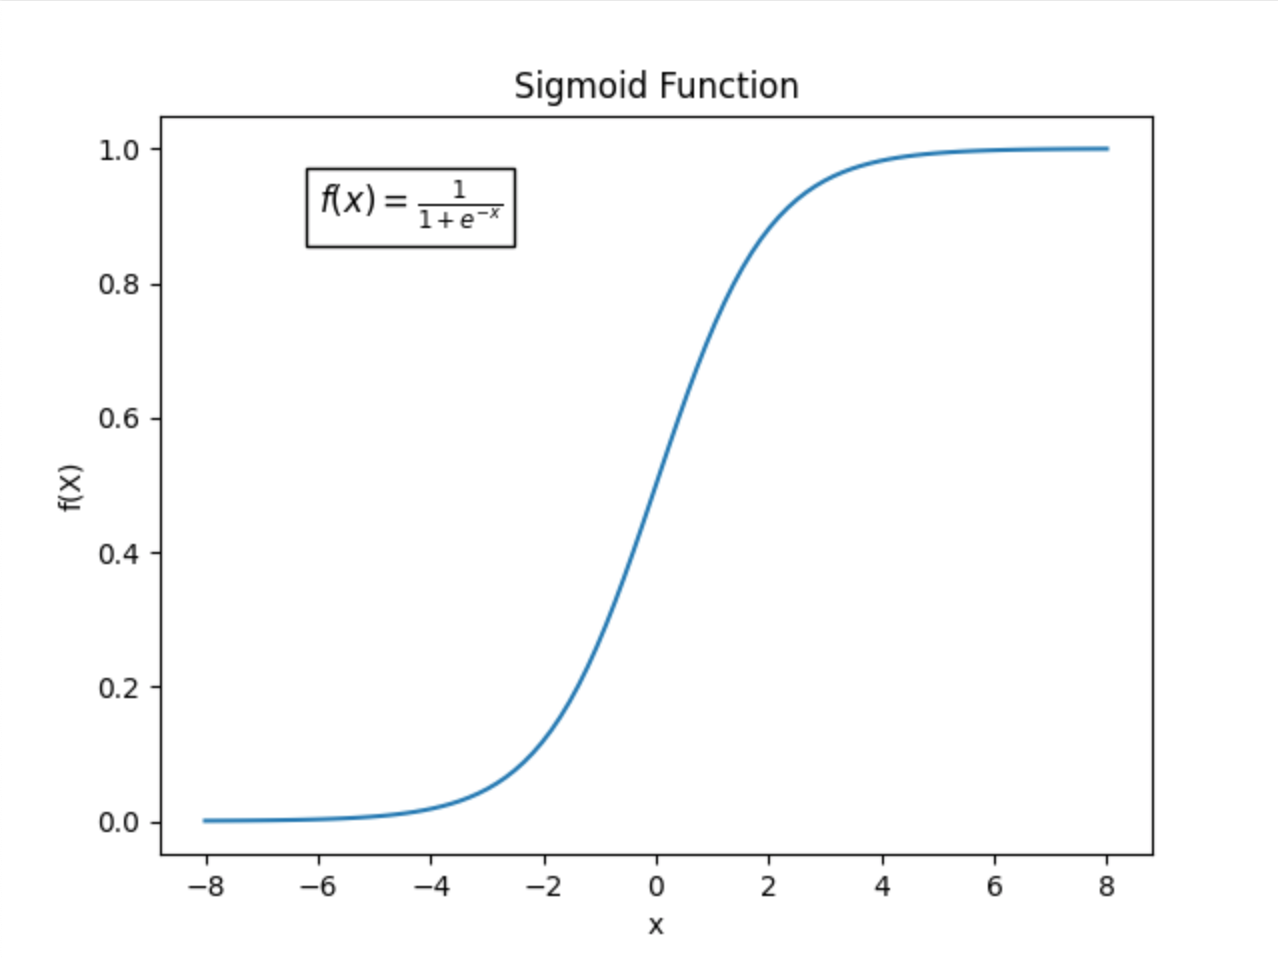

### 1.1.3. Hidden Layer to Output

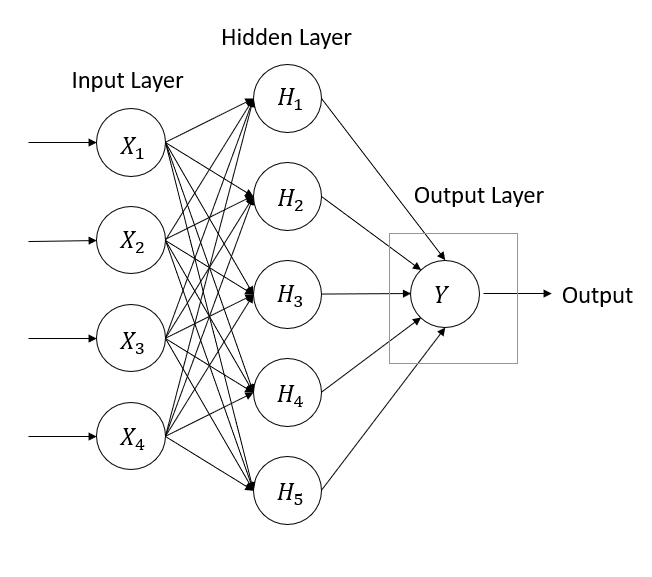![NN.png](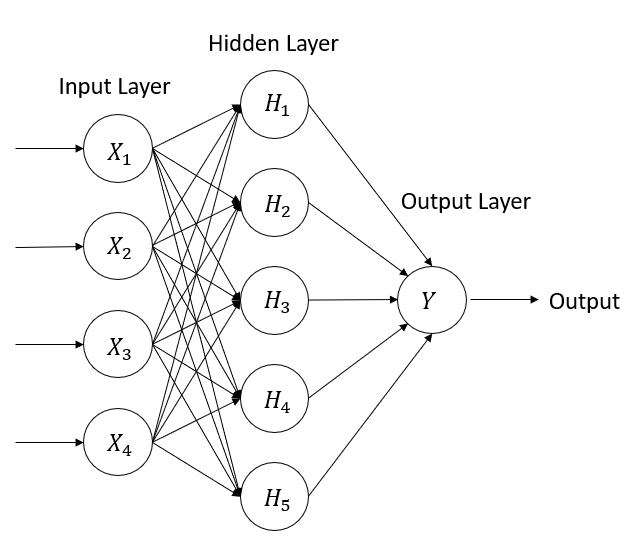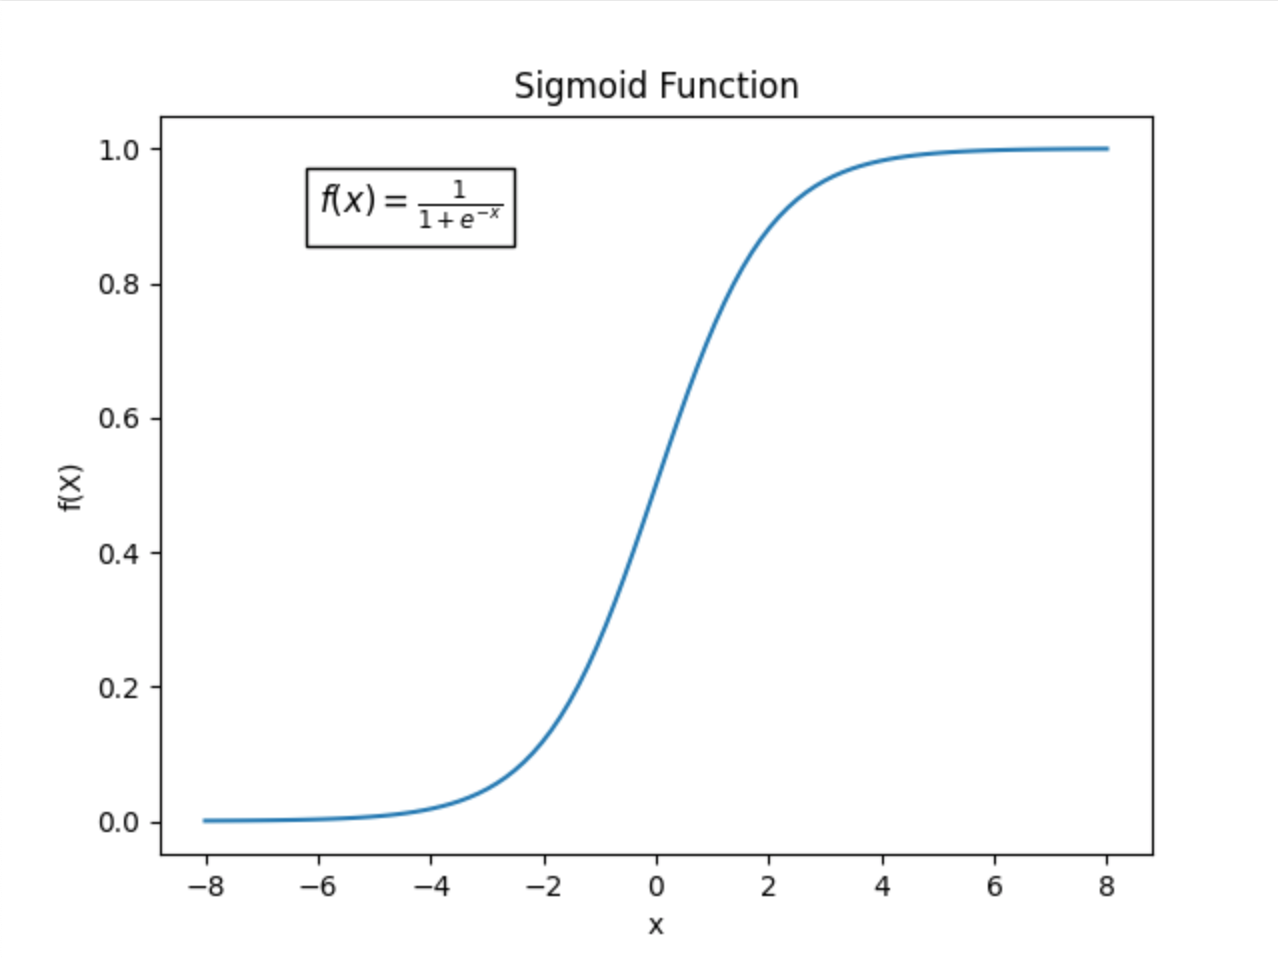)

Output is calculated from hidden layers by applying linearity, and activation consecutively

$O^1 = \delta_{1} H_1 + \delta_{2} H_2 + \delta_{3} H_3 + \delta_{4} H_4$

$O = \sigma(O^1)$



## 1.2. Code

In [1]:
import torch

In [2]:
import torch

class ForwardPropagation:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initializes the ForwardPropagation class with randomly initialized weights and placeholders for intermediate values.

        Parameters:
        - input_size (int): Number of input features.
        - hidden_size (int): Number of neurons in the hidden layer.
        - output_size (int): Number of output neurons.
        """
        self.W1 = torch.randn(input_size, hidden_size)
        self.W2 = torch.randn(hidden_size, output_size)
        self.z = None
        self.z2 = None
        self.z3 = None
        self.output = None

    def forward(self, X):
        """
        Performs forward propagation through the neural network.

        Parameters:
        - X (torch.Tensor): Input data.

        Returns:
        - torch.Tensor: Output prediction.
        """
        # First layer operation: dot product of input and weights
        self.z = torch.matmul(X, self.W1)

        # Apply sigmoid activation to the first layer output
        self.z2 = self.sigmoid(self.z)

        # Second layer operation: dot product of hidden layer output and weights
        self.z3 = torch.matmul(self.z2, self.W2)

        # Apply sigmoid activation to the final output
        self.output = self.sigmoid(self.z3)

        return self.output

    def sigmoid(self, s):
        """
        Sigmoid activation function.

        Parameters:
        - s (torch.Tensor): Input data.

        Returns:
        - torch.Tensor: Output after applying the sigmoid activation.
        """
        return 1 / (1 + torch.exp(-s))


# 2. Backward Propagation

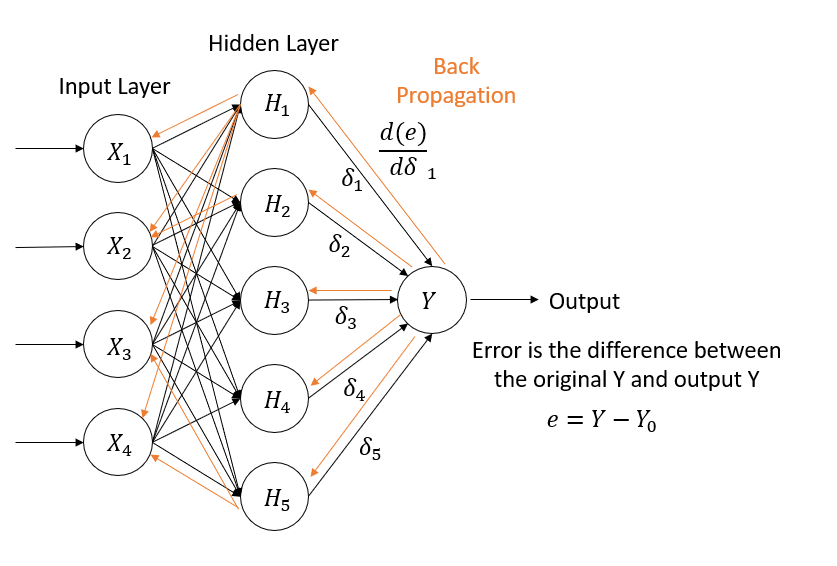

## 2.1. Math

Once Forward Propagation is done, we calculate the error by taking difference between actual value and predicted value.

  $e = Y-Y_0$

We have to minimise error for better results.

At the minimum, the slope of function tends to zero.

We can use this property to minimize the error.

$\frac{d(e)}{dX} = 0$

Which means, slope wrt each component is zero

$[\frac{d(e)}{dX_1},\frac{d(e)}{dX_2},\frac{d(e)}{dX_3},\frac{d(e)}{dX_4}] = [0, 0, 0, 0]$


But the error(e) is function of Y, which is dependent on values in hidden layer and respective weights.

These hidden layer values are further a function of input values and input weights.

Thus we can write the differential as

$\frac{de}{dX_i} = \frac{de}{d\delta_j}.\frac{d\delta_j}{dW_k}.\frac{dW_k}{dX_i} $

using chain rule

## 2.2. Code

In [3]:
class BackwardPropagation:
    def __init__(self):
        """
        Initializes the BackwardPropagation class with placeholders for errors and deltas during the backward pass.
        """
        self.o_error = None
        self.o_delta = None
        self.z2_error = None
        self.z2_delta = None

    def backward(self, X, y, o, W1, W2, z2):
        """
        Performs backward propagation to compute gradients for weight updates.

        Parameters:
        - X (torch.Tensor): Input data.
        - y (torch.Tensor): Ground truth labels.
        - o (torch.Tensor): Output predictions.
        - W1 (torch.Tensor): Weights of the first layer.
        - W2 (torch.Tensor): Weights of the second layer.
        - z2 (torch.Tensor): Output of the hidden layer after activation.

        Returns:
        - torch.Tensor: Gradient of the loss with respect to W1.
        - torch.Tensor: Gradient of the loss with respect to W2.
        """
        # Compute error and delta for the output layer
        self.o_error = y - o
        self.o_delta = self.o_error * self.sigmoiddiff(o)

        # Compute error and delta for the hidden layer
        self.z2_error = torch.matmul(self.o_delta, torch.t(W2))
        self.z2_delta = self.z2_error * self.sigmoiddiff(z2)

        # Compute gradients for weight updates
        return torch.matmul(torch.t(X), self.z2_delta), torch.matmul(torch.t(z2), self.o_delta)

    def sigmoiddiff(self, s):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - s (torch.Tensor): Input data.

        Returns:
        - torch.Tensor: Output after applying the sigmoid derivative.
        """
        return s * (1 - s)


# 3. Application on Real Data

We'll apply the ANN on existing Covid data i.e.,

Explanatory variables are symptoms - **Fever, Tiredness, Dry-Cough,...**

Response variable is **severity**

In [6]:
import pandas as pd
data = pd.read_csv("Covid-Data.csv")

In [8]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [10]:
data.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
data.head(10)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
5,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,1,0,0,China
6,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,0,1,China
7,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,China
8,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,0,1,1,0,0,China
9,1,1,1,1,1,0,1,1,1,1,...,1,0,0,0,1,0,0,0,1,China


In [12]:
# Create the feature variable 'X' by excluding specified target columns.
X = data.drop(['Severity_Severe', 'Severity_Moderate', 'Severity_None'], axis=1)

# Create the target variable 'y' by selecting only specified target columns.
y = data[['Severity_Severe', 'Severity_Moderate', 'Severity_None']]

## Hyper Parameters

In [13]:
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

In [14]:
input_size = X.shape[1]
hidden_size = 32  # Choose an appropriate size
output_size = y.shape[1]  # Number of target variables

# Initialize and train the model
model = ForwardPropagation(input_size, hidden_size, output_size)


**Epochs:**



*   Epochs represent the number of times the entire dataset is processed by the neural network during training. In the example, 100 epochs were chosen.
*   Using too few epochs might result in underfitting, while using too many epochs can lead to overfitting. Overfitting can be addressed by employing techniques such as early stopping or dropout.



**Learning Rate:**



*   The learning rate determines the size of the step taken during the optimization process. A higher learning rate allows for faster convergence, but it might overshoot the minimum. A lower learning rate may ensure stability but can result in slow convergence.
*   Learning rates need to be carefully tuned. Too high a learning rate can cause divergence, while too low a learning rate can slow down convergence.


**Hidden Layer Size:**



*   The number of neurons in the hidden layers determines the capacity of the neural network to capture complex patterns.

*   Too few neurons may result in underfitting, while too many can lead to overfitting. A balance needs to be struck based on the complexity of the problem.





In [18]:
epochs = 1000  # Hyper parameter
learning_rate = 0.01  # Hyper parameter

for epoch in range(epochs):
    # Forward pass
    output = model.forward(X_tensor)

    # Backward pass
    backward_propagation = BackwardPropagation()
    W1_grad, W2_grad = backward_propagation.backward(X_tensor, y_tensor, output, model.W1, model.W2, model.z2)

    # Update weights
    model.W1 += learning_rate * W1_grad
    model.W2 += learning_rate * W2_grad

# Evaluate the model
predictions = (model.forward(X_tensor) > 0.5).float()
accuracy = (predictions == y_tensor).float().mean()
print(f"Accuracy: {accuracy.item() * 100:.2f}%")


Accuracy: 75.00%


We have achieved a model of accuracy 75%